<a href="https://colab.research.google.com/github/c-mertes/RNAseq-ASHG19/blob/master/colab_notebooks/Getting_Started_with_Colab_and_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of content

* [R Notebooks in Google Colab](#rnote-colab)
  * [Enable editing by making a copy](#make-copy)
  * [Code cells and execution](#code-cell)
  * [Text cells](#text-cell)
  * [Addin and moving cells](#adding-cells)
* [Setup R environment](#setup-r)
* [OUTRIDER example](#outrider-example)
* [Exercise](#Exercise)

# R Notebooks in Google Colab <a name="rnote-colab"></a>

We will use IR notebooks throughout this workshop to run code and visualize results. IR notebooks are similar to IPython notebooks. It combines documentation with code in a single document. If you know already how to use notebooks please skip to the [OUTRIDER example](#outrider-example). Since we will extensively use R/Bioconductor packages it is helpful but not needed to have some basic knowledge of programming in R. To get started with programming in R have a look [here](https://moderndive.netlify.com/1-getting-started.html) or [here](https://rladiessydney.org/courses/ryouwithme/basicbasics).

A notebook is a list of cells. Cells contain either explanatory text (text cells) or executable code (code cells) and its output. Double click a cell to select/edit it.

The notebook and code is run on a virtual maschine hosted by Google.

For more details on how to use Google Colab and IPython notebooks please refer to the [Colab docs](https://colab.research.google.com/notebooks/welcome.ipynb) and the [IPyhton notebook docs](https://jupyter.org/).

## Enable editing by making a copy <a name="make-copy"></a>

To enable **editing** of the notebook please make a copy of it and place it into your google drive. Please click on: `"File" -> "Save a copy in Drive"`. Allow access to your google drive if requested. 

## Code cells <a name="code-cell"></a>

Below is a **code cell**. Once the toolbar button indicates CONNECTED on the right top, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime menu**.

In [1]:
12
a = 10 + 5
a

[1] 12

[1] 15

## Text cells <a name="text-cell"></a>
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see the [markdown
guide](/notebooks/markdown_guide.ipynb).

You can also add math to text cells using [LaTeX](http://www.latex-project.org/)
to be rendered by [MathJax](https://www.mathjax.org). Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$

## Adding and moving cells <a name="adding-cells"></a>

You can add new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down** in the top toolbar.

## Navigation bar

If you click on the left top corner on the arrow a navigation bar will open. The navigation bar contains the table of content and links the sections. Additionally under the `Files` tab one can browse all files in the virtual machine as well as up- and download files. Mounting of the google drive is only available in a python notebook right now.

# Setup R environment <a name="setup-r"></a>

Since installing and compiling all necessary R packages can take a while, we precompiled them. By downloading our [`r-env-setup-script.R`](https://github.com/c-mertes/RNAseq-ASHG19/blob/master/r-env-setup-script.R) and running it, you setup and configure the virtual maschine for the workshop.

Please run this command **before any analysis** and **each time you start a new session**!

In [2]:
download.file("https://raw.githubusercontent.com/c-mertes/RNAseq-ASHG19/master/r-env-setup-script.R", "r-env-setup-script.R")
source("r-env-setup-script.R")

Update and install needed Ubuntu packages

Download R package cache

Unzipping R package cache

Retrieve data for tutorials



# OUTRIDER example <a name="outrider-example"></a>

This is the quick guide from the vignette of [`OUTRTIDER`](http://bioconductor.org/packages/release/bioc/html/OUTRIDER.html). For the full guide of `OUTRIDER` please have a look at the [vignette](http://bioconductor.org/packages/release/bioc/vignettes/OUTRIDER/inst/doc/OUTRIDER.pdf).

First we have to install `OUTRIDER` if not done already.

In [3]:
if(!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")
if(!requireNamespace("OUTRIDER", quietly=TRUE))
    BiocManager::install("OUTRIDER", Ncpus=10)

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



Now we can run the example from the OUTRIDER vignette

In [7]:
# load package
library(OUTRIDER)

In [9]:
# load raw count and sample data
ctsFile <- system.file('extdata', 'KremerNBaderSmall.tsv', package='OUTRIDER')
ctsTable <- read.table(ctsFile, check.names=FALSE)
ods <- OutriderDataSet(countData=ctsTable)

The `ods` object contains now all information (eg. raw counts, sample names, and gene names) needed for the analysis.

In [10]:
ods

class: OutriderDataSet
class: RangedSummarizedExperiment 
dim: 999 119 
metadata(1): version
assays(1): counts
rownames(999): DDX11L1 OR4F5 ... GORAB PRRX1
rowData names(0):
colnames(119): 65937 66623 ... MUC1412 MUC1436
colData names(1): sampleID

Before we start the analysis, we should cleanup the data first.

In [11]:
# filter out non expressed genes
ods <- filterExpression(ods, minCounts=TRUE, filterGenes=TRUE)

229 genes did not pass the filter due to zero counts. This is 22.9% of the genes.



Now we can fit our autoencoder model and compute p-values

In [15]:
# run full OUTRIDER pipeline (control, fit model, calculate P-values)
register(MulticoreParam(2))
ods <- OUTRIDER(ods, iterations=4)

Fri Sep 18 16:42:47 2020: SizeFactor estimation ...

Fri Sep 18 16:42:47 2020: Controlling for confounders ...

Using estimated q with: 23

Fri Sep 18 16:42:47 2020: Using the autoencoder implementation for controlling.



[1] "Fri Sep 18 16:42:49 2020: Initial PCA loss: 4.73997327486604"
[1] "Fri Sep 18 16:42:58 2020: Iteration: 1 loss: 4.19551565209768"
[1] "Fri Sep 18 16:43:02 2020: Iteration: 2 loss: 4.17573666163257"
Time difference of 9.903764 secs
[1] "Fri Sep 18 16:43:02 2020: 2 Final nb-AE loss: 4.17573666163257"


Fri Sep 18 16:43:03 2020: Used the autoencoder implementation for controlling.

Fri Sep 18 16:43:03 2020: P-value calculation ...

Fri Sep 18 16:43:03 2020: Zscore calculation ...



Lets have now a look at the results. They can be retrived by running `results()`.

In [16]:
# results (only significant)
res <- results(ods)
head(res)

geneID,sampleID,pValue,padjust,zScore,l2fc,rawcounts,normcounts,meanCorrected,theta,aberrant,AberrantBySample,AberrantByGene,padj_rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
RPS27,MUC1372,4.572707e-11,2.543649e-07,-7.12,-1.13,949,3894.87,8080.12,96.27,TRUE,10,1,1
ATAD3C,MUC1360,1.664669e-10,9.260018e-07,5.14,1.77,948,321.26,117.30,17.52,TRUE,1,1,1
MSTO1,MUC1367,1.454107e-09,8.088730e-06,-6.40,-0.85,761,770.35,1302.50,143.98,TRUE,1,1,1
NBPF15,MUC1351,1.778623e-09,9.893904e-06,5.64,0.76,7591,7474.44,4676.83,108.18,TRUE,2,1,1
HDAC1,MUC1350,2.458735e-09,1.367715e-05,-6.29,-0.89,2215,2122.33,3693.69,119.61,TRUE,1,1,1
DCAF6,MUC1374,4.469979e-08,2.486505e-04,-5.78,-0.63,2348,2944.65,4492.57,190.88,TRUE,1,1,1


We can also look into more details on a specific gene or sample 

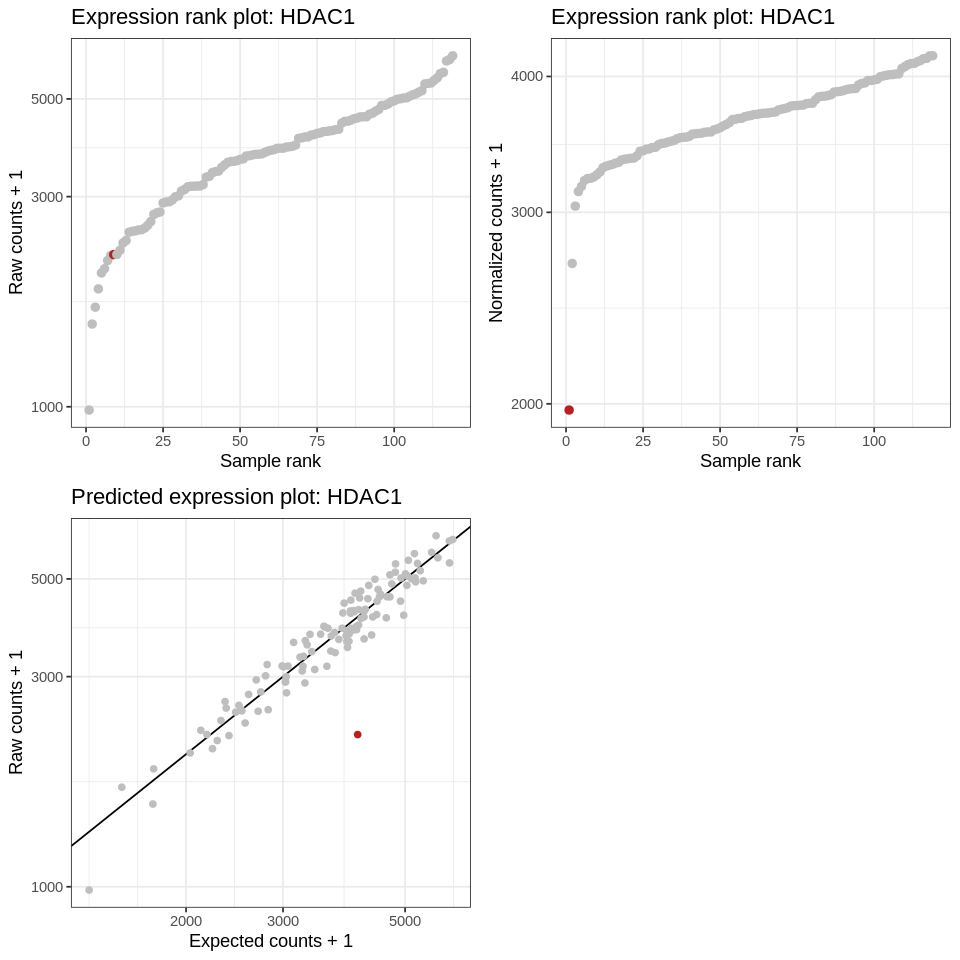

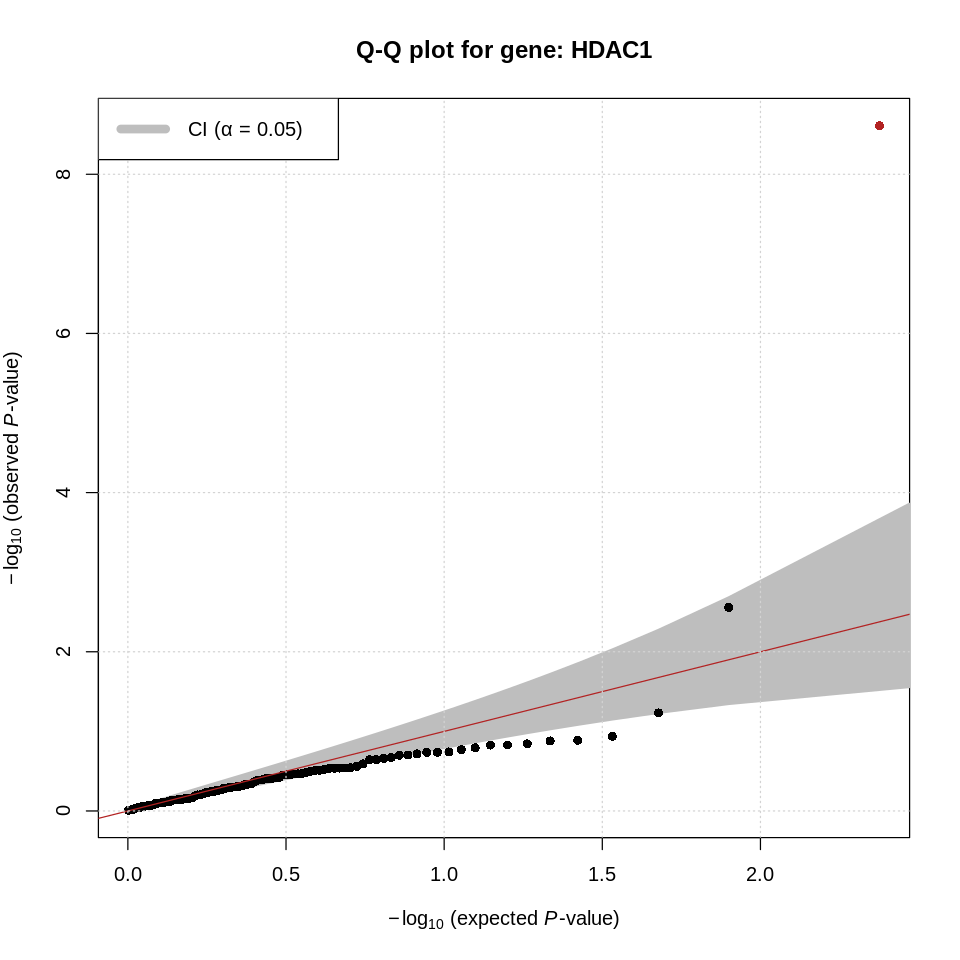

In [24]:
# Options to define plots size
options(repr.plot.width=8, repr.plot.height=8)

# example gene expression plot across samples
library(ggpubr)
ggarrange(
    plotExpressionRank(ods, res[5, geneID], normalize=FALSE, base=TRUE),
    plotExpressionRank(ods, res[5, geneID], normalize=TRUE, base=TRUE),
    plotExpectedVsObservedCounts(ods, res[5, geneID], base=TRUE))

# a quantile-quantile plot to check if the modeling worked
plotQQ(ods, res[5, geneID])

# Exercise <a name="Exercise"></a>

If you want to check if you got the IPython notebook idea and a bit of R programming, you can start now your own analysis by editing this notebook.

We give you 3 tasks you should be able to manage:

1. Add a new code cell and plot a volcano plot (function: `plotVolcano`) for sample `MUC1350` with parameter `base=TRUE`
1. Write a comment (text cell) that you will now display the gene names found significant in the analysis
1. Print the gene names (column: `geneID`) from the results table (object: `res`) and furthermore print the number of genes in total in `res` (function: `nrow`)


In [ ]:
# Options to define plots size
options(repr.plot.width=4, repr.plot.height=4)

# have fun coding here
